# gradient ascent for principal components analysis 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size= 100)
X[:,1] = 0.75+X[:,0]+3+np.random.normal(0,10.,size=100)

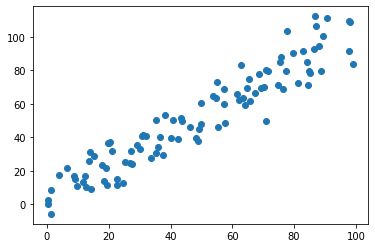

In [9]:
plt.scatter(X[:,0],X[:,1])

## 降维 demean

In [13]:
def demean(X):
    return X - np.mean(X,axis = 0)
# demean(X)

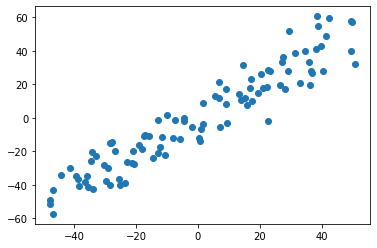

In [15]:
X_demean = demean(X)
plt.scatter(X_demean[:,0],X_demean[:,1])

In [17]:
np.mean(X_demean[:,0]) # == 0

-4.334310688136611e-15

## gradient ascent

![](./1.png) ![](./2.png) ![](./3.png)

In [18]:
def f(w,X):
    return np.sum((X.dot(w)**2))/len(X)

![](./4.png)

In [21]:
def df_math(w,X):
    return X.T.dot(X.dot(w))*2./len(X)

In [22]:
def df_debug(w,X,epsilon = 0.0001):
    res = np.array(len((w)))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] +=epsilon
        w_2 = w.copy()
        w_2[i] -=epsilon
        res[i] = (f(w_1,X)-f(w_2,X))/(2*epsilon)
    return res

In [25]:
def direction(w):
    return w/np.linalg.norm(w) # 求单位向量 
    
def gradient_ascent(df,X,initial_w,eta,n_iters =1e4, epsilon = 1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w,X)
        last_w = w
        w= w+eta*gradient
        w = direction(w)

        if(abs(f(w,X)-f(last_w,X))<epsilon):
            break
        cur_iter +=1
    return w

In [28]:
initial_w = np.random.random(X.shape[1])
initial_w

array([0.11009419, 0.53187477])

In [29]:
eta = 0.001

In [31]:
# np.mean(X_demean[:,1 ])

In [36]:
#  gradient_ascent(df_debug,X_demean,initial_w,eta) #??
gradient_ascent(df_math,X_demean,initial_w,eta)    #??

/Users/Tommy/opt/anaconda3/envs/test01/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/Users/Tommy/opt/anaconda3/envs/test01/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/Tommy/opt/anaconda3/envs/test01/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


array([nan, nan])